# PROJECT BIG DATA: Classification of diabetes. <br>

*__First step__: Preprocess (Missing values, Outliers, Normalization, Feature selection) <br>

*__Second step__: Algorithms of ML (Train-Test split, Random Forest, Decision Tree, Cross-Validation) <br>

*__Third step__: Models Evaluation (Accuracy, Precision, Recall, F1-Score, ROC-AUC)

## First Step

In [9]:
import pandas as pd
import numpy as np

Loading dataset

In [15]:
data = pd.read_csv('diabetes_dataset.csv')
data_ = pd.read_csv('diabetes_dataset_2.csv')

__MISSING VALUES__


Replace the value 'No Info' with NaN in the 'smoking_history' column

In [16]:
data['smoking_history'] = data['smoking_history'].replace("No Info", np.nan)
data_['smoking_history'] = data_['smoking_history'].replace("No Info", np.nan)

Checking for missing values

In [17]:
print(data_.isna().sum())

year                        0
gender                      0
age                         0
location                    0
race:AfricanAmerican        0
race:Asian                  0
race:Caucasian              0
race:Hispanic               0
race:Other                  0
hypertension                0
heart_disease               0
smoking_history         35816
bmi                         0
hbA1c_level                 0
blood_glucose_level         0
diabetes                    0
dtype: int64


Fill the NaN values in the 'smoking_history' column with the most frequent value

In [28]:
data['smoking_history'] = data['smoking_history'].fillna(data['smoking_history'].mode()[0])

In [19]:
print(data['smoking_history'])

0              never
1              never
2              never
3              never
4              never
            ...     
99995          never
99996          never
99997           ever
99998    not current
99999          never
Name: smoking_history, Length: 100000, dtype: object


Check for any missing values that were not detected

In [29]:
print(data.isna().sum())
data.to_csv("/Users/paliaangelike/Documents/Big Data/diabetes_dataset.csv", index=False)

year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64


__OUTLIERS__

In [32]:
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

Checking for outliers to remove them

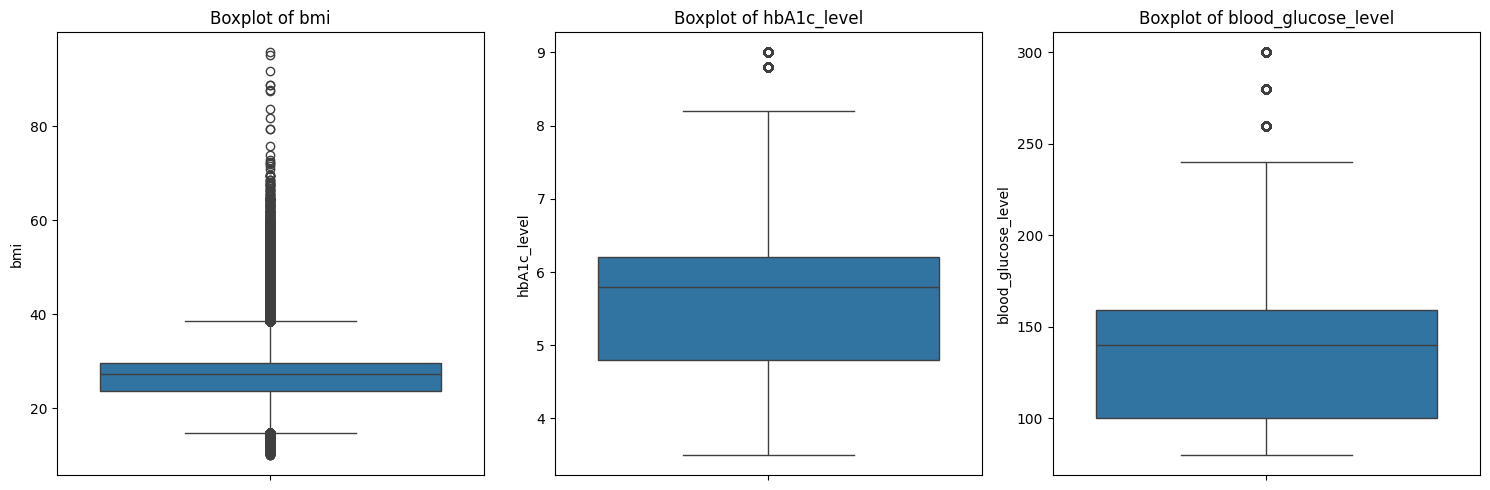

In [33]:
columns = ['bmi', 'hbA1c_level', 'blood_glucose_level']

fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

for i, col in enumerate(columns):

    sns.boxplot(ax=axes[i], y=data[col])

    axes[i].set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()    

Removing the outliers

In [34]:
columns = ['bmi', 'hbA1c_level', 'blood_glucose_level']

for col in columns:

    percentile25 = data[col].quantile(0.25)

    percentile75 = data[col].quantile(0.75)


    # IQR calculated for the column

    iqr = percentile75 - percentile25


    # Calculating upper and lower limit

    upper_limit = percentile75 + 1.5 * iqr

    lower_limit = percentile25 - 1.5 * iqr


    # Removing outliers by clipping the values

    data[col] = np.clip(data[col], lower_limit, upper_limit)

Checking columns boxplots to see them after outliers removal


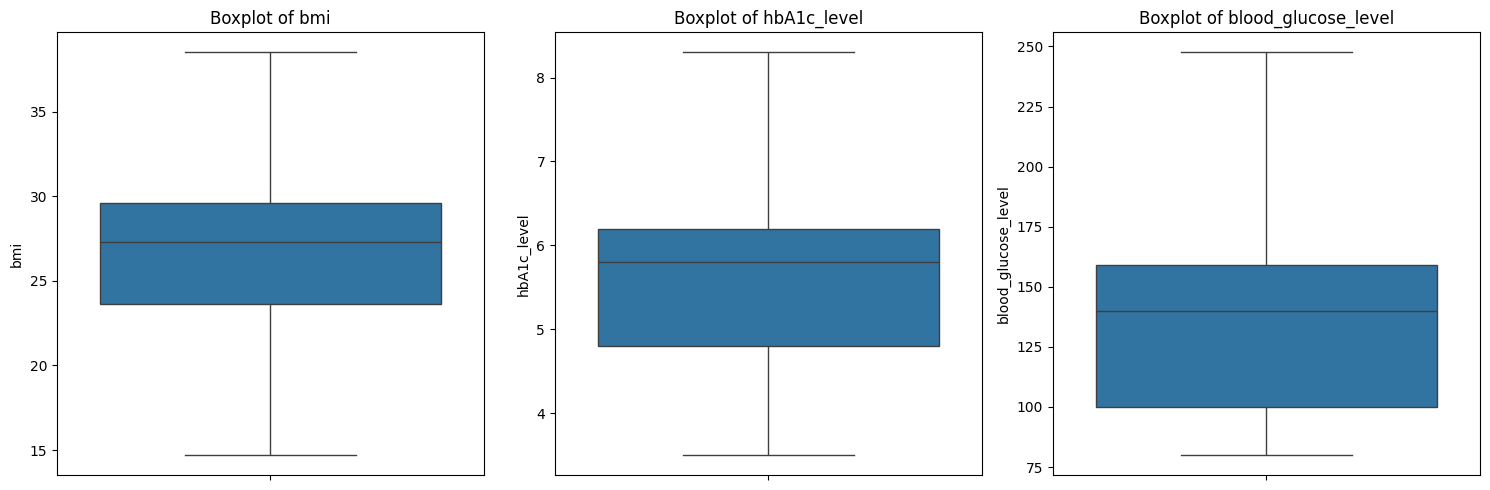

In [35]:
columns = ['bmi', 'hbA1c_level', 'blood_glucose_level']

# Create subplots with one row and as many columns as there are in the list
fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

# Plot each column's boxplot in a separate subplot
for i, col in enumerate(columns):

    sns.boxplot(ax=axes[i], y=data[col])

    axes[i].set_title(f'Boxplot of {col}')


# Adjust layout
plt.tight_layout()
plt.show()

__NORMALIZATION__

In [14]:
columns = ['bmi', 'hbA1c_level', 'blood_glucose_level']

for col in columns:
  normalized_dataset = (data[col] - np.min(data[col])) / (np.max(data[col]) - np.min(data[col]))
  print(normalized_dataset)

0        0.530042
1        0.220378
2        0.380462
3        0.530042
4        0.380042
           ...   
99995    0.273319
99996    0.922479
99997    0.899790
99998    0.612815
99999    0.103151
Name: bmi, Length: 100000, dtype: float64
0        0.312500
1        0.312500
2        0.270833
3        0.104167
4        0.625000
           ...   
99995    0.625000
99996    0.458333
99997    0.562500
99998    0.520833
99999    0.312500
Name: hbA1c_level, Length: 100000, dtype: float64
0        0.119403
1        0.059701
2        0.477612
3        0.471642
4        0.059701
           ...   
99995    0.059701
99996    0.119403
99997    0.465672
99998    0.447761
99999    0.059701
Name: blood_glucose_level, Length: 100000, dtype: float64


__FEATURE SELECTION__

In [15]:
from sklearn.preprocessing import LabelEncoder

Check Columns

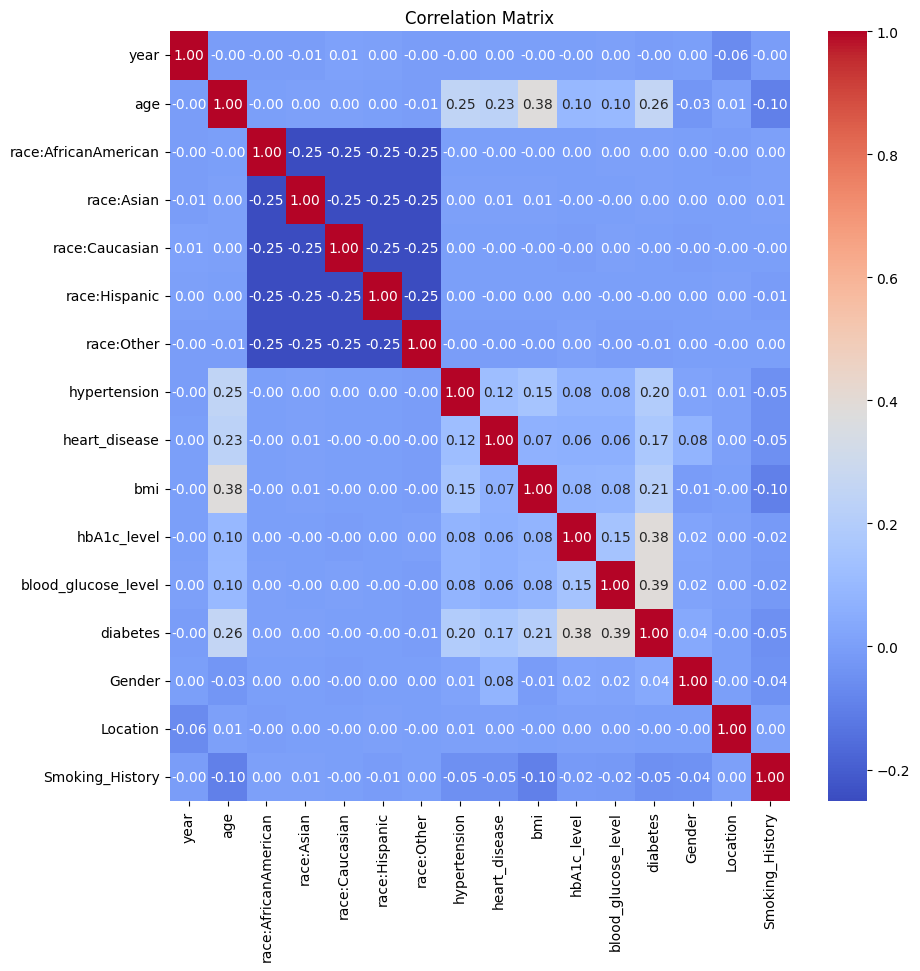

                          year       age  race:AfricanAmerican  race:Asian  \
year                  1.000000 -0.003304             -0.004291   -0.007224   
age                  -0.003304  1.000000             -0.002183    0.003787   
race:AfricanAmerican -0.004291 -0.002183              1.000000   -0.251859   
race:Asian           -0.007224  0.003787             -0.251859    1.000000   
race:Caucasian        0.010587  0.003790             -0.250765   -0.249148   
race:Hispanic         0.004153  0.001962             -0.250860   -0.249241   
race:Other           -0.003172 -0.007336             -0.251725   -0.250102   
hypertension         -0.003806  0.251171             -0.001201    0.003977   
heart_disease         0.001820  0.233354             -0.000664    0.006166   
bmi                  -0.001895  0.380410             -0.001418    0.005935   
hbA1c_level          -0.000084  0.097098              0.001296   -0.000658   
blood_glucose_level   0.003398  0.102481              0.002870  

In [16]:
le_gender = LabelEncoder()
le_location = LabelEncoder()

le_smoking_history  = LabelEncoder()

data['Gender'] = le_gender.fit_transform(data['gender'])
data['Location'] = le_location.fit_transform(data['location'])
data['Smoking_History'] = le_smoking_history.fit_transform(data['smoking_history'])
data_2 = data.drop(['gender','location','smoking_history'],axis='columns')
data_2
#
correlation_matrix = data_2.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#
correlation_matrix = data_2.corr()

print(correlation_matrix)

Select Columns

In [17]:
columns_to_display = ['hypertension', 'heart_disease','bmi','hbA1c_level','blood_glucose_level','Smoking_History','diabetes']
selected_columns = data_2[columns_to_display]

df=pd.DataFrame(selected_columns)
df

,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,Smoking_History,diabetes
0,0,0,27.32,5.0,100.0,3,0
1,0,0,19.95,5.0,90.0,3,0
2,0,0,23.76,4.8,160.0,3,0
3,0,0,27.32,4.0,159.0,3,0
4,0,0,23.75,6.5,90.0,3,0
...,...,...,...,...,...,...,...
99995,0,0,21.21,6.5,90.0,3,0
99996,0,0,36.66,5.7,100.0,3,0
99997,0,0,36.12,6.2,158.0,1,0
99998,0,0,29.29,6.0,155.0,4,0


## Second Step

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

Definition of features (X) and target (y)

In [19]:
X = df.drop(columns=['diabetes'])  
y = df['diabetes'] 

Split Train-Test

In [20]:
splits = {
    "90/10": 0.9,
    "80/20": 0.8,
    "70/30": 0.7,
    "60/40": 0.6
}

Results

In [21]:
results = {}

for split_name, train_ratio in splits.items():
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_ratio, random_state=42)
    
    # Stratified K-Fold, 5-Fold
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  
    
    # Random Forest
    rf_model = RandomForestClassifier(random_state=42)
    rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='accuracy')
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    y_pred_rf_prob = rf_model.predict_proba(X_test)[:, 1]
    rf_accuracy = accuracy_score(y_test, y_pred_rf)
    rf_roc_auc = roc_auc_score(y_test, y_pred_rf_prob)

    # Decision Tree
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=kfold, scoring='accuracy')
    dt_model.fit(X_train, y_train)
    y_pred_dt = dt_model.predict(X_test)
    y_pred_dt_prob = dt_model.predict_proba(X_test)[:, 1]
    dt_accuracy = accuracy_score(y_test, y_pred_dt)
    dt_roc_auc = roc_auc_score(y_test, y_pred_dt_prob)
    
    # Storage of results
    results[split_name] = {
        "Random Forest Accuracy (Test)": rf_accuracy,
        "Random Forest ROC-AUC (Test)": rf_roc_auc,
        "Random Forest CV Mean Accuracy": np.mean(rf_cv_scores),
        "Random Forest CV Std": np.std(rf_cv_scores),
        "Decision Tree Accuracy (Test)": dt_accuracy,
        "Decision Tree ROC-AUC (Test)": dt_roc_auc,
        "Decision Tree CV Mean Accuracy": np.mean(dt_cv_scores),
        "Decision Tree CV Std": np.std(dt_cv_scores),
        "Random Forest Report": classification_report(y_test, y_pred_rf, output_dict=True),
        "Decision Tree Report": classification_report(y_test, y_pred_dt, output_dict=True),
    }

## Third Step

Display of results

In [22]:
for split_name, metrics in results.items():
    print(f"Results split: {split_name}")
    print(f"Random Forest Test Accuracy: {metrics['Random Forest Accuracy (Test)']:.2f}")
    print(f"Random Forest Test ROC-AUC: {metrics['Random Forest ROC-AUC (Test)']:.2f}")
    print(f"Random Forest CV Mean Accuracy: {metrics['Random Forest CV Mean Accuracy']:.2f}")
    print(f"Random Forest CV Std: {metrics['Random Forest CV Std']:.5f}")
    print(f"Decision Tree Test Accuracy: {metrics['Decision Tree Accuracy (Test)']:.2f}")
    print(f"Decision Tree Test ROC-AUC: {metrics['Decision Tree ROC-AUC (Test)']:.2f}")
    print(f"Decision Tree CV Mean Accuracy: {metrics['Decision Tree CV Mean Accuracy']:.2f}")
    print(f"Decision Tree CV Std: {metrics['Decision Tree CV Std']:.5f}")
    print()   

Results split: 90/10
Random Forest Test Accuracy: 0.96
Random Forest Test ROC-AUC: 0.94
Random Forest CV Mean Accuracy: 0.97
Random Forest CV Std: 0.00089
Decision Tree Test Accuracy: 0.96
Decision Tree Test ROC-AUC: 0.87
Decision Tree CV Mean Accuracy: 0.96
Decision Tree CV Std: 0.00066

Results split: 80/20
Random Forest Test Accuracy: 0.97
Random Forest Test ROC-AUC: 0.94
Random Forest CV Mean Accuracy: 0.97
Random Forest CV Std: 0.00104
Decision Tree Test Accuracy: 0.96
Decision Tree Test ROC-AUC: 0.87
Decision Tree CV Mean Accuracy: 0.96
Decision Tree CV Std: 0.00095

Results split: 70/30
Random Forest Test Accuracy: 0.97
Random Forest Test ROC-AUC: 0.94
Random Forest CV Mean Accuracy: 0.97
Random Forest CV Std: 0.00188
Decision Tree Test Accuracy: 0.96
Decision Tree Test ROC-AUC: 0.86
Decision Tree CV Mean Accuracy: 0.96
Decision Tree CV Std: 0.00197

Results split: 60/40
Random Forest Test Accuracy: 0.97
Random Forest Test ROC-AUC: 0.94
Random Forest CV Mean Accuracy: 0.97
Rando